### Data Analytics 3

    1. Implement Simple Naive Bayes classification algorithm using Python/R on iris.csv dataset.
    2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the given dataset.

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import itertools

In [15]:
data = pd.read_csv("iris.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [16]:
data.isnull().sum()
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [17]:
inputs = data.drop(['species'], axis=1)
targets = data['species']

x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.3, random_state=365)

In [18]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [19]:
y_pred = gnb.predict(x_test)
metrics.accuracy_score(y_test, y_pred)*100

97.77777777777777

In [20]:
def plot_confusion_matrix(
        cm,
        classes,
        normalize = False,
        title = 'Confusion Matrix',
        cmap=plt.cm.Blues
                            ):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix : ")
    else:
        print("Confusion Matrix, without normalization")
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation= 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Confusion Matrix, without normalization
[[13  0  0]
 [ 0 17  0]
 [ 0  1 14]]


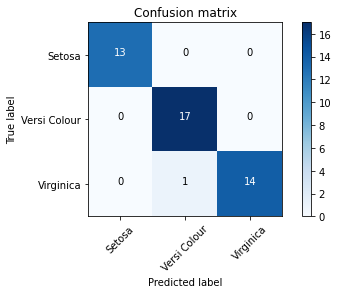

In [22]:
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

print(classification_report(y_test, y_pred))

plt.figure()
plot_confusion_matrix(cm, classes=['Setosa','Versi Colour', 'Virginica'],normalize= False,  title='Confusion matrix')